# Rice Leaves Detection

In [1]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


## Data Collecting

Data berisi gambar penyakit padi BrownSpot dan daun padi yang sehat. Data sudah terbagi ke dalam 3 bagian yaitu train, validation, dan test.

In [2]:
train_dir = os.path.join('dataset', 'ready_dataset', 'train')
val_dir = os.path.join('dataset', 'ready_dataset', 'val')
test_dir = os.path.join('dataset', 'ready_dataset', 'test')

In [3]:
# jumlah file masing masing bagian dan kelas

for part in os.listdir(os.path.join('dataset', 'ready_dataset')):
    list_jumlah_file_baru = {}
    print(part)
    for kelas in os.listdir(os.path.join('dataset', 'ready_dataset', part)):
        list_jumlah_file_baru[kelas] = len(os.listdir(os.path.join('dataset', 'ready_dataset', part, kelas)))

    print(list_jumlah_file_baru)

test
{'BrownSpot': 52, 'Healthy': 148}
train
{'BrownSpot': 377, 'Healthy': 377}
val
{'BrownSpot': 94, 'Healthy': 268}


In [4]:
# jumlah total file
files_cnt = 0

for path, dirs, files in os.walk(os.path.join('dataset', 'ready_dataset')):
    files_cnt += len(files)

print(f'Total file = {files_cnt}')

Total file = 1316


## Exploratory Data Analysis

Menampilkan sampel gambar dari setiap kelas


Sampel gambar kelas BrownSpot


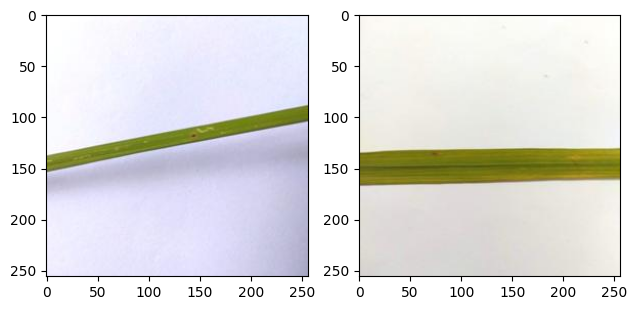


Sampel gambar kelas Healthy


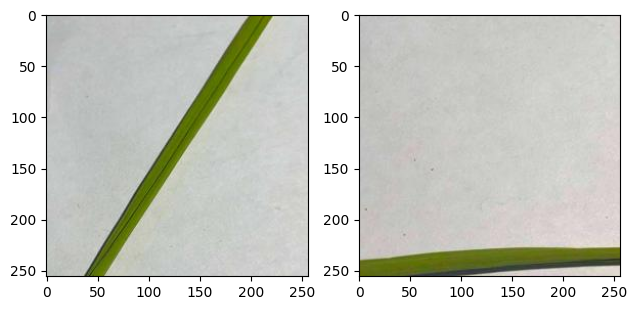

In [5]:
random_number = random.randint(0, 377)
for kelas in os.listdir(train_dir):
    path_kelas = os.path.join(train_dir, kelas) # /dataset/ricelll/train/brownspot
    print(f"\nSampel gambar kelas {kelas}")
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number])) # /dataset/ricelll/train/brownspot/imhg_ksjs.jpg
    )
    axs[1].imshow(
        load_img(os.path.join(path_kelas,
                              os.listdir(path_kelas)[random_number+2]))
    )
    fig.tight_layout()
    plt.show()

## Data Preprocessing

Preprocessing menggunakan augmentasi gambar. Proses-proses augmentasi gambar meliputi:

- Normalisasi data, CNN lebih cepat memproses data dengan rentang 0-1 daripada 0-255. Caranya tinggal bagi semua dengan 255.
- Rotasi, 20 derajat
- Flip horizontal
- Flip vertical
- Shear
- Geser tinggi (height shift)
- Geser lebar (width shift)

In [6]:
train_datagen = ImageDataGenerator(
                    rescale=1./255, # normalisasi gambar
                    rotation_range=20, # memutar gambar
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range=0.2,
                    # zoom_range=0.5,
                    height_shift_range=0.2,
                    width_shift_range=0.2,
                    fill_mode='nearest')

# untuk data test dan val hanya di normalisasi saja
val_datagen = test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(244,244), # mengubah resolusi seluruh gambar jadi 244*244
    batch_size=32, # jumlah sampel pelatihan yang digunakan dalam satu iterasi
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='binary'
)

Found 754 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 362 images belonging to 2 classes.


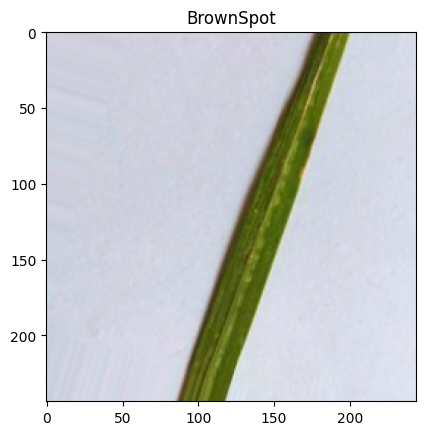

In [8]:
# gambar setelah preprocessing
image, label  = train_generator.next()
plt.title(os.listdir(train_dir)[int(label[0])])
plt.imshow(image[0])